In [84]:
#installing libraries
! pip install pandas
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn
! pip install numpy


In [85]:
#importing libraries
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [86]:
df = pd.read_csv("thyroidDF.csv")

#allows displaying all the rows when using df.head()
pd.set_option("display.max_rows", None)

#allows displaying all the columns when using df.head()
pd.set_option("display.max_columns", None)

#dropping the redundant columns
df.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)

#re-maps the db dictionary for understanding
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

#re-mapping
df["target"] = df["target"].map(diagnoses)
df.dropna(subset=['target'], inplace=True)

df.info(verbose=True, null_counts=True)

#To visualize data
df.describe()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7546 non-null   int64  
 1   sex                  7296 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   query_hypothyroid    7546 non-null   object 
 10  query_hyperthyroid   7546 non-null   object 
 11  lithium              7546 non-null   object 
 12  goitre               7546 non-null   object 
 13  tumor                7546 non-null   object 
 14  hypopituitary        7546 non-null   object 
 15  psych                7546 non-null   o

,age,TSH,T3,TT4,T4U,FTI,TBG
count,7546.000000,6824.000000,5337.000000,7192.000000,6870.000000,6877.000000,259.000000
mean,78.013782,5.421753,2.020935,105.203373,0.967322,110.571745,22.955019
std,1305.258137,26.080471,0.809865,32.606462,0.162315,36.600867,6.088392
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000
25%,37.000000,0.570000,1.600000,87.000000,0.870000,93.000000,20.000000
50%,55.000000,1.400000,2.000000,103.000000,0.960000,108.000000,23.000000
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000,45.000000


In [87]:
#shows ages above 100
df[df.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
2976,455,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.10,2.0,118.0,1.13,104.0,NaN,negative
5710,65511,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.38,2.0,113.0,1.08,104.0,NaN,negative
6392,65512,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,0.03,2.8,112.0,0.84,133.0,NaN,negative
8105,65526,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.50,NaN,132.0,1.02,129.0,NaN,negative


In [88]:
#nullifying where ages are greater than 100
df['age'] = np.where((df.age > 100), np.nan, df.age)

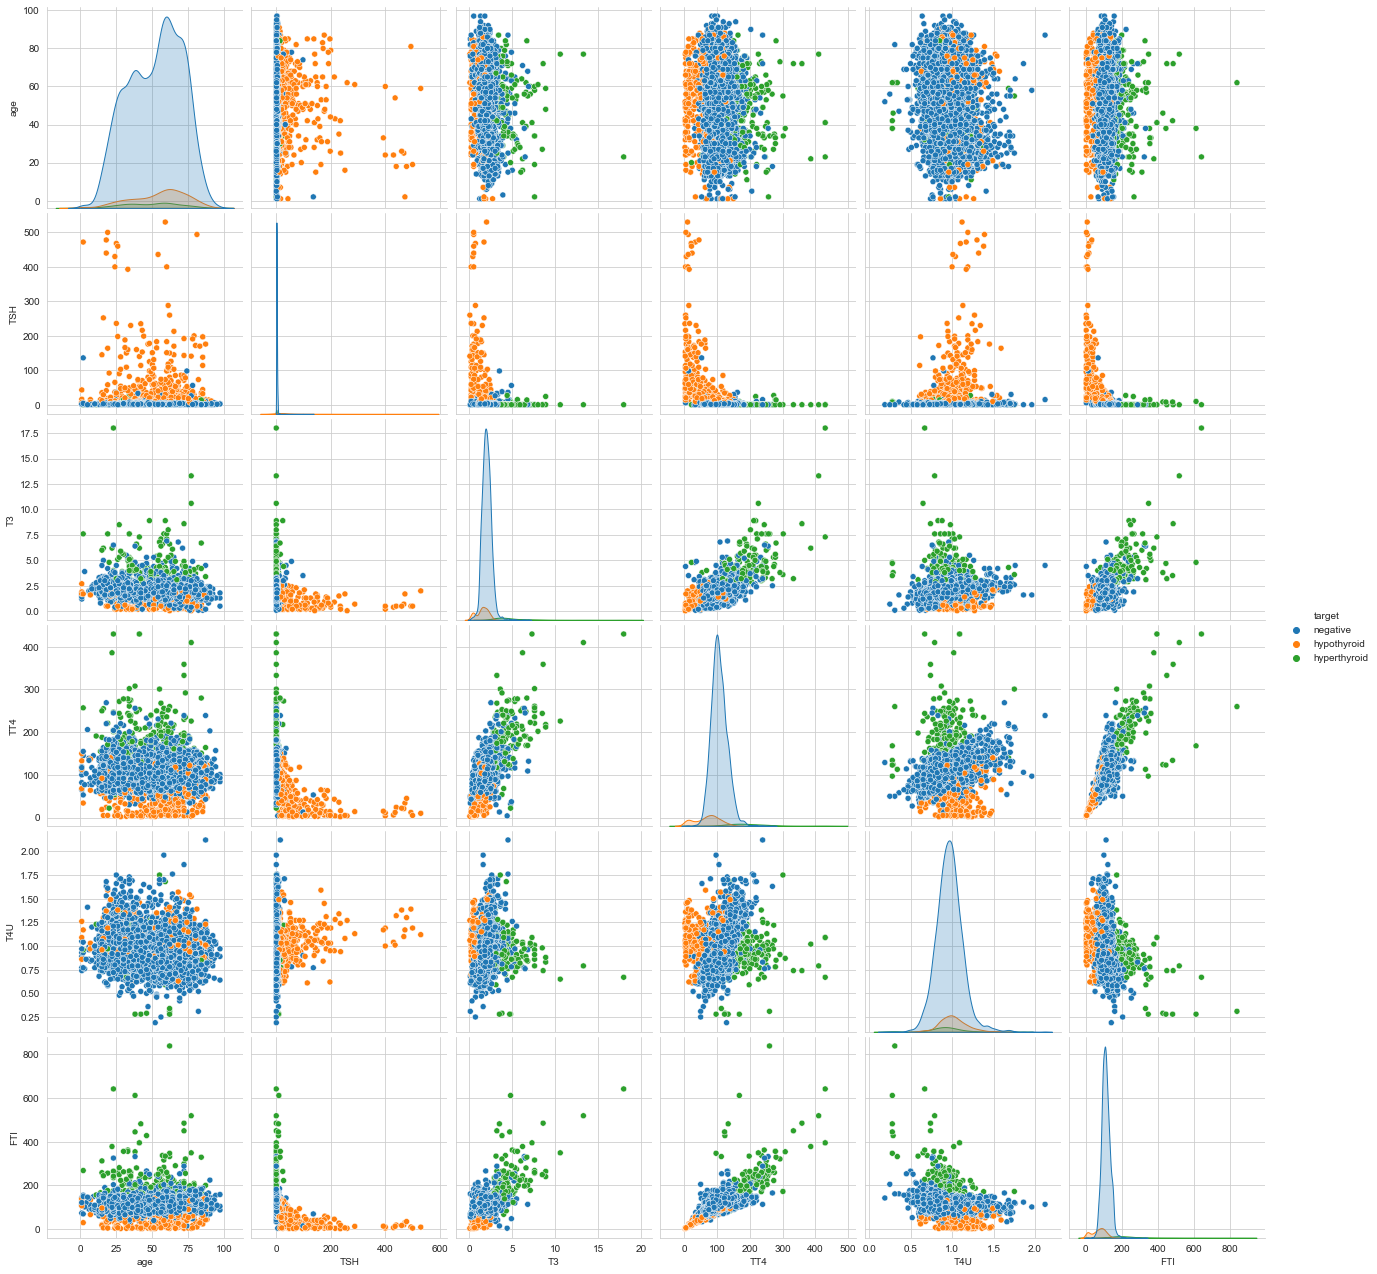

In [89]:
#creating pair plot grid to identify clusters
pairs = df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.set_style('whitegrid')
sns.pairplot(pairs, hue='target', height=3)
plt.show()

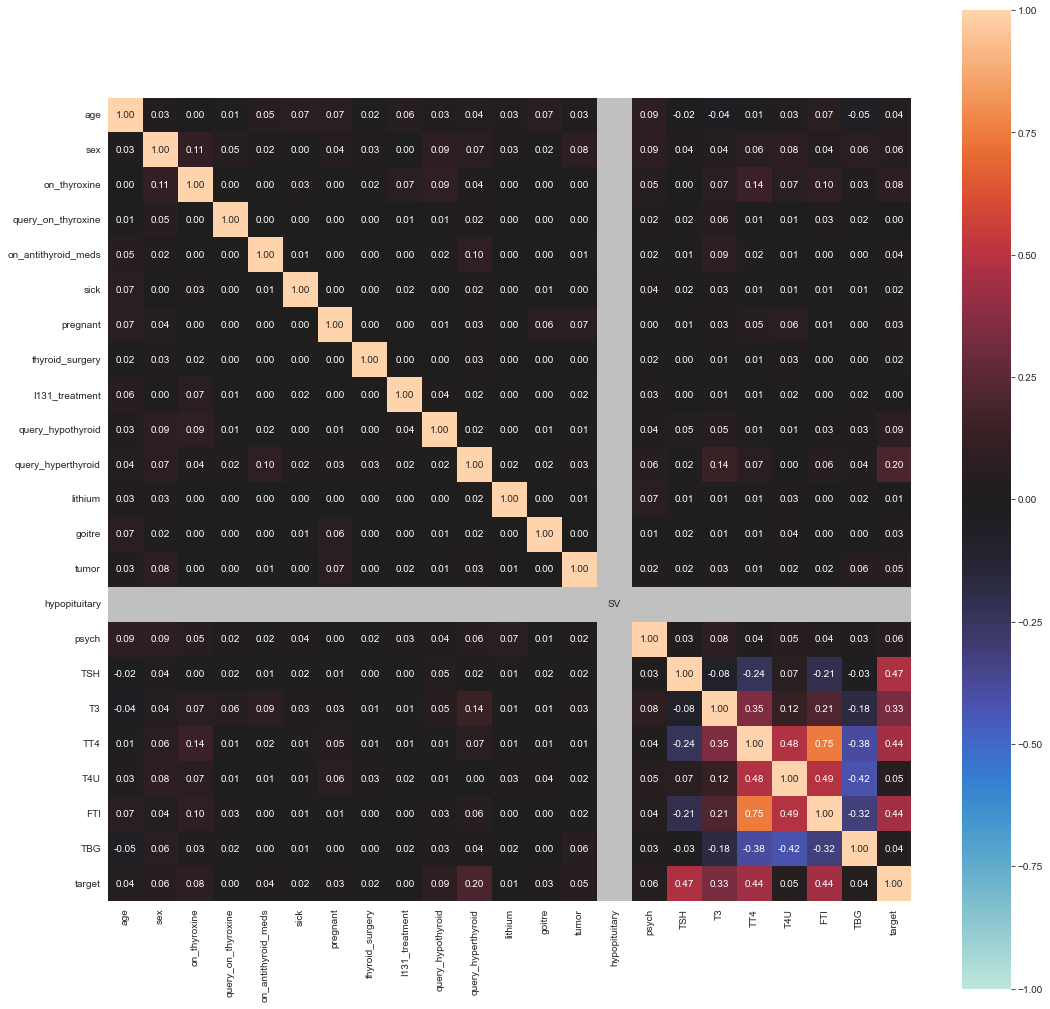

In [90]:
! pip install dython
#creating the correlation matrix to help identify relationships
import dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features = identify_nominal_columns(df)

associations(df, 
            nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',  
            ax=None, annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
            compute_only=False, clustering=False, title=None, filename=None, 
            figsize=(18,18))

In [91]:
# Calculates the missingness of the overall dataset
missingness = df.isnull().sum().sum() / df.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

# Create table for missing data analysis
def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (round(df.isnull().sum()/df.isnull().count(), 2)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Analyze missing data
missing_table(df).head(10)

Overall Missingness of thyroidDF is: 7.54%


,Total,Percent
TBG,7287,0.97
T3,2209,0.29
TSH,722,0.10
T4U,676,0.09
FTI,669,0.09
TT4,354,0.05
sex,250,0.03
age,4,0.00
thyroid_surgery,0,0.00
on_thyroxine,0,0.00


In [92]:
# dropping 'TBG' attribute from dataset
df.drop(['TBG'], axis=1, inplace=True)

# finally dropping the ages > 100
df.dropna(subset=['age'], inplace=True)

# assumption of pregnancy to be female to decrease missingness
df['sex'] = np.where((df.sex.isnull()) & (df.pregnant == 't'), 'F', df.sex)

# calculates dataset missigness 
missingness = df.isnull().sum().sum() / df.count().sum()
print('Overall Missingness of df is: {:.2f}%'.format(missingness * 100))

print
missing_table(df).head(10)

Overall Missingness of df is: 3.03%


,Total,Percent
T3,2208,0.29
TSH,722,0.10
T4U,676,0.09
FTI,669,0.09
TT4,354,0.05
sex,249,0.03
target,0,0.00
thyroid_surgery,0,0.00
on_thyroxine,0,0.00
query_on_thyroxine,0,0.00
